Import packacges.

In [1]:
# %matplotlib notebook

%reload_ext autoreload
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, PolynomialFeatures, scale

%aimport Sherlock
from Sherlock import Sherlock
from RBF import bases
from utils import adrs, read_design_space, approximate_pareto
import dcor

try: import GPy
except: pass

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

import logging
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.ERROR, datefmt='%I:%M:%S')

%autoreload 1

Read the design space.

In [2]:
X, y, _, names, _ = read_design_space('../../final_result_impl_mergesort.csv',
                                      use_hint=False, random_factor=0.0, hint_random_factor=0.0,
                                      return_names=True)

Plot the design space.

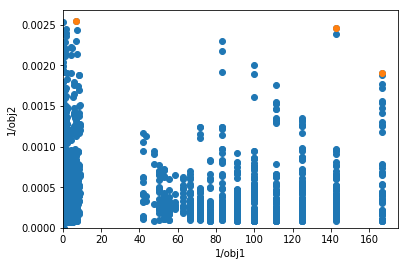

In [3]:
plt.figure()
y_pareto = approximate_pareto(y)[0]
plt.scatter(y[:,0], y[:,1])
plt.scatter(y_pareto[:,0], y_pareto[:,1])
plt.xlabel("1/" + names[-2])
plt.ylabel("1/" + names[-1])
plt.xlim(left=y[:,0].min()*0.95, right=y[:,0].max()*1.05)
plt.ylim(bottom=y[:,1].min()*0.95, top=y[:,1].max()*1.05)
plt.show()

Run Sherlock.

0.0


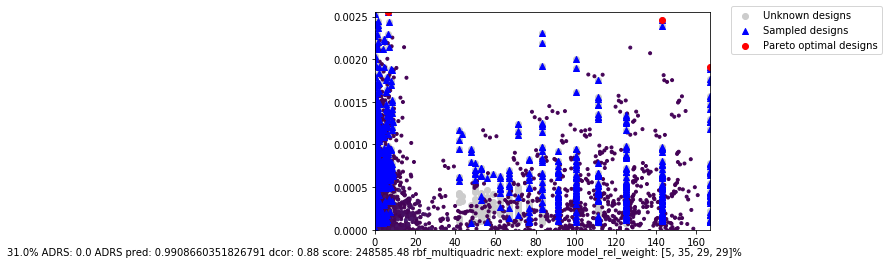

In [4]:
sherlock = Sherlock(
    n_init=5,
    budget=int(X.shape[0]*0.31),
    surrogate_type="rbfthin_plate-rbf_multiquadric-randomforest-gpy", #rbfthin_plate-rbf_multiquadric-randomforest-gpy
    kernel="matern",
    num_restarts=0,
    pareto_margin=0,
    y_hint=None,
    output_stats="", #"adrs,dcor,dcor_energy,entropy,pareto_score,next_action",
    plot_design_space=True,
    use_ted_in_loop=False,
    request_output=lambda y, idx: None,
    action_only=None,
    n_hint_init=0,
    scale_output=True,
    use_trace_as_prior=True,
    model_selection_type="mab10")

sherlock.fit(X).predict(X,y)
err = adrs(y, sherlock.known_idx, approximate=True)
print(err)

In [5]:
sherlock.known_idx

array([1094, 2017,  431, 2916, 3190, 1716, 1120,  869, 3162,  850, 3175,
        768,   33,    1,  215,   41,   21,   22, 1619, 3139, 1642, 3177,
       3053, 3085, 3049, 1615,   57,  807,  802, 1620, 3050,  958, 1236,
       2487,  734, 1637, 3065, 1705, 2563, 2540,  739, 3144, 1660, 2511,
       2535, 3138, 1616, 2490, 2728, 3187, 1253, 2514,  717, 2771,  786,
        740, 3109,  787, 3046, 3048,  763,  885, 2558, 1877, 3160,  721,
        934,  746, 2581, 3135, 3136,  758, 2512, 2569, 3061, 1837, 1967,
       1682,    9, 2753,  728, 2870, 1001,  729,   24, 1638, 3031,  720,
       3022, 1687,  738,  900,    0,   35, 3185, 3171, 1283,  181,  917,
       2156, 3142, 3052, 1910,   78, 1661, 1819, 2488, 2510,  718,  785,
       3134, 3095, 3057, 1625,  761, 2395,  726, 3056,  792,  884,    8,
       1700, 2816, 1618, 1706, 3082, 1643, 2489, 1235, 2743,   11,  722,
        705,  745, 3066,  723, 2805, 2559,  998, 1626,  741, 1636, 1915,
       2493, 3153,  798,  876, 3025,  793,  769, 25